In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv("C:/PW/Semestr 4/ML/Projekt 1/data/learning_data.csv")

In [45]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [46]:
# rozmiar ramki
df.shape

(3360, 17)

In [47]:
# podział ramki 
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [48]:
# podział na zbior do analizy i zbior dla walidatorów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Wstępna analiza**

In [49]:
df_learning = X_train.join(y_train)

In [50]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 847 to 2132
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  2352 non-null   object 
 1   TYPE                         2352 non-null   object 
 2   BEDS                         2352 non-null   int64  
 3   BATH                         2352 non-null   float64
 4   PROPERTYSQFT                 2352 non-null   float64
 5   ADDRESS                      2352 non-null   object 
 6   STATE                        2352 non-null   object 
 7   MAIN_ADDRESS                 2352 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  2352 non-null   object 
 9   LOCALITY                     2352 non-null   object 
 10  SUBLOCALITY                  2352 non-null   object 
 11  STREET_NAME                  2352 non-null   object 
 12  LONG_NAME                    2352 non-null   object 
 13  FORMATTED_ADDRES

In [51]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

47

In [52]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [53]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,2305.000000,2305.000000,2305.000000,2305.000000,2305.000000,2.305000e+03
mean,3.407375,2.403067,2222.817828,40.713670,-73.940811,2.876538e+06
std,2.870806,2.184383,2429.408294,0.087031,0.101551,4.501892e+07
min,1.000000,0.000000,250.000000,40.499546,-74.253033,2.494000e+03
25%,2.000000,1.000000,1216.000000,40.640289,-73.987443,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.726784,-73.948599,8.000000e+05
75%,4.000000,3.000000,2184.207862,40.770158,-73.868404,1.540000e+06
max,50.000000,50.000000,55300.000000,40.912729,-73.703950,2.147484e+09


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

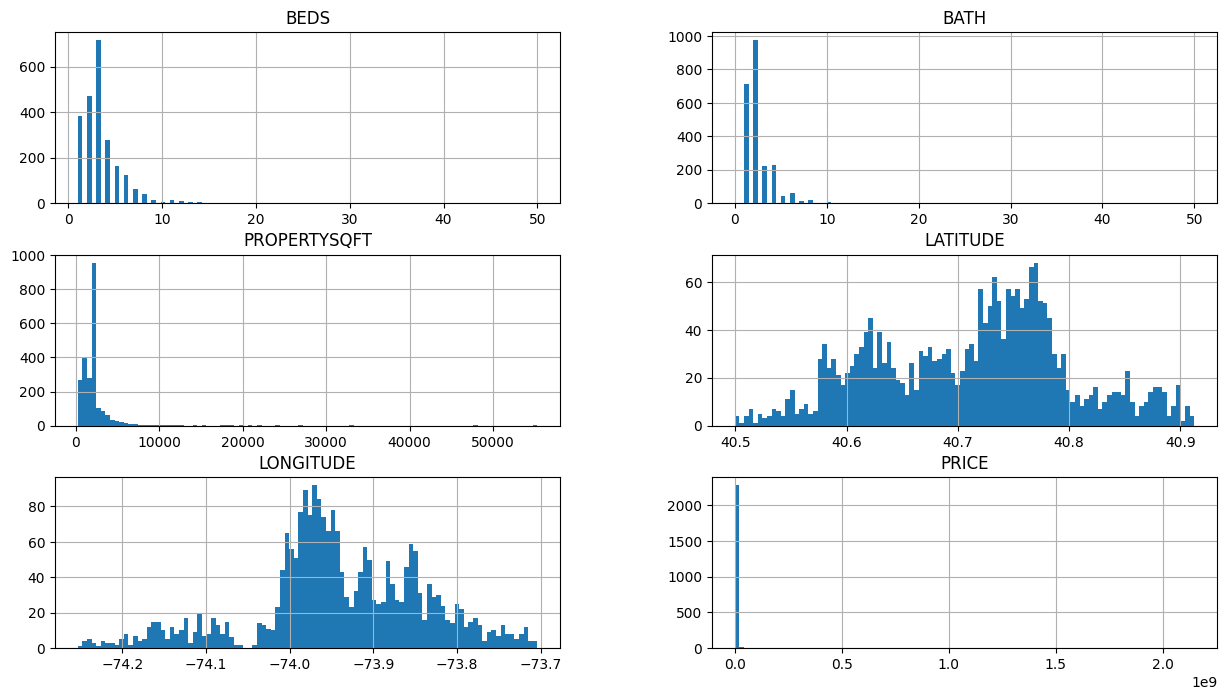

In [54]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

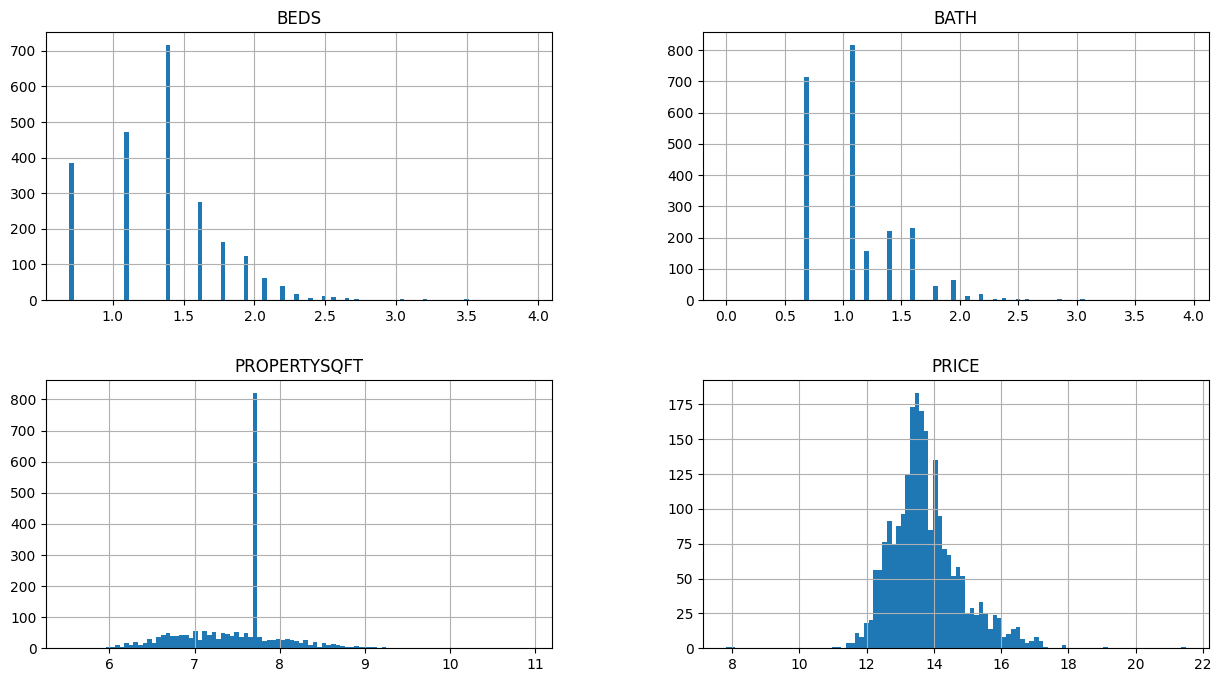

In [55]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

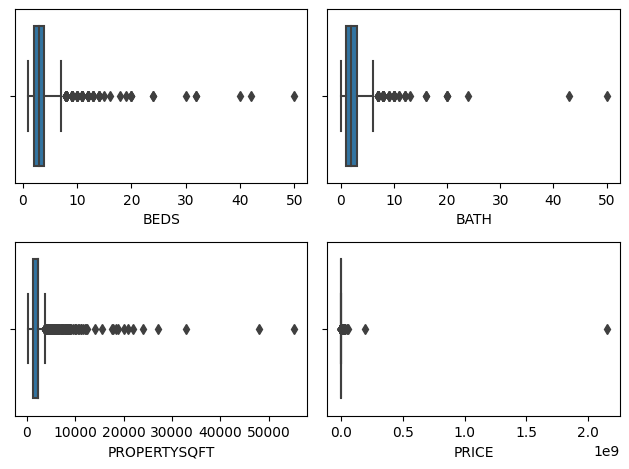

In [56]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

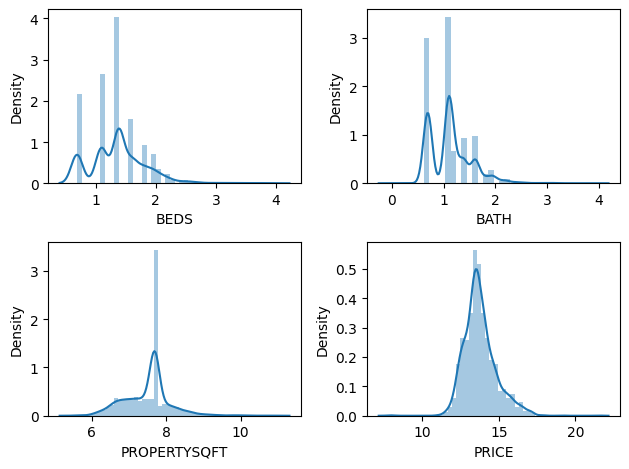

In [57]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

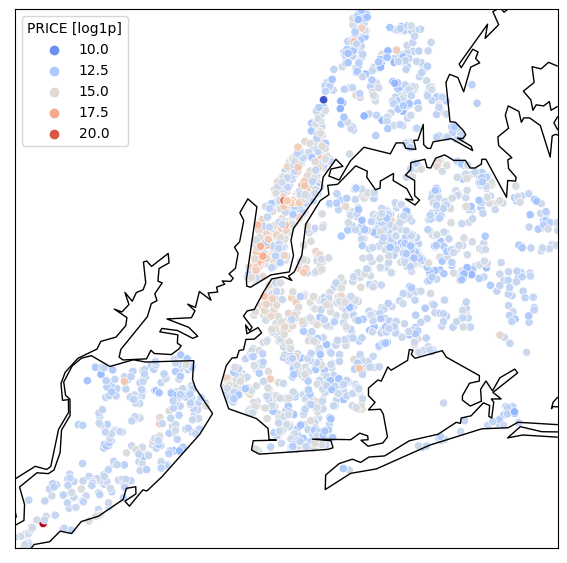

In [58]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()

In [59]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['Price_log'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['Price_log'].mean()
std_pr = df_learning['Price_log'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['Price_log'] >= lower) & (df_learning['Price_log'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 2305
Po: 2283


In [60]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2283
Wyjściowy rozmiar:  2182


In [61]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2182
Wyjściowy rozmiar:  2095


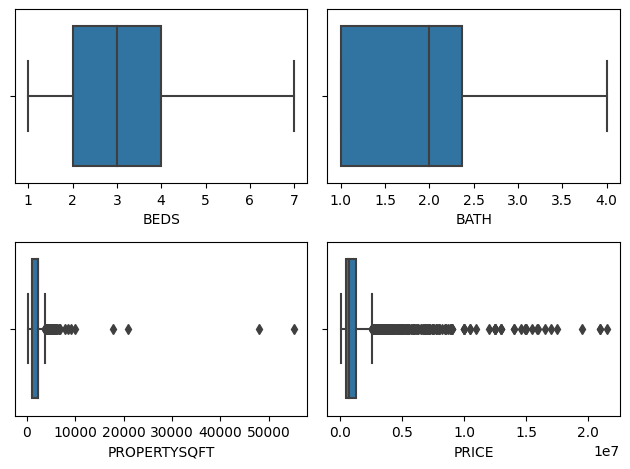

In [62]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

In [63]:
# TO mi nie działa idk co tam jest
'''from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()'''

'from mpl_toolkits.basemap import Basemap\n\nplt.figure(figsize=(12, 7))\nm = Basemap(projection=\'merc\', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution=\'h\')\n\nm.drawcoastlines()\nm.drawcountries()\nx, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)\n\nsns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")\n\nplt.legend(title= "PRICE [log1p]")\nplt.show()'

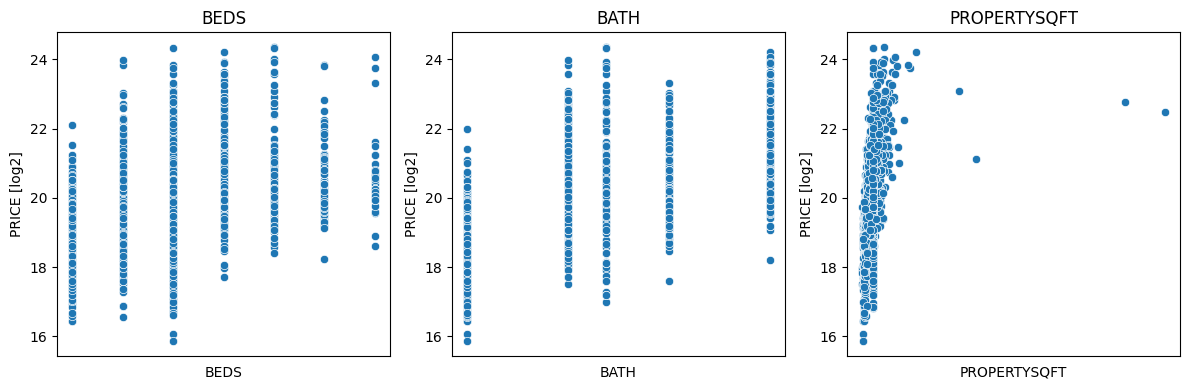

In [64]:
#Florini opisz pls
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

<AxesSubplot: >

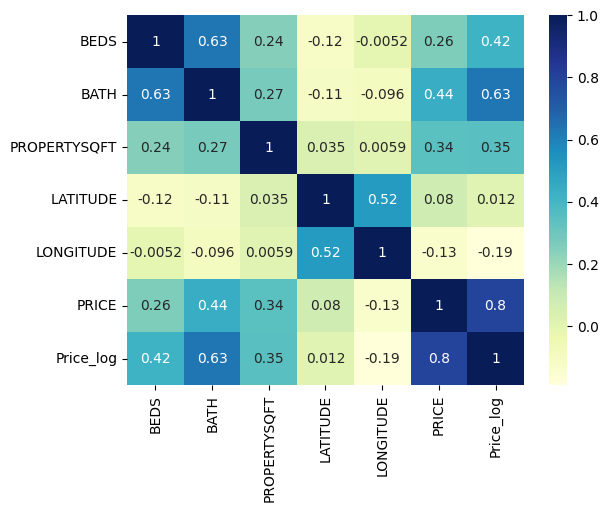

In [65]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [66]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     672
TYPE                             11
ADDRESS                        2095
STATE                           261
MAIN_ADDRESS                   2095
ADMINISTRATIVE_AREA_LEVEL_2      19
LOCALITY                         10
SUBLOCALITY                      15
STREET_NAME                     131
LONG_NAME                      1560
FORMATTED_ADDRESS              2088
dtype: int64

In [67]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [68]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                              194
Brokered by Douglas Elliman - 575 Madison Ave     61
Brokered by Brown Harris Stevens                  38
Brokered by Corcoran East Side                    38
Brokered by Winzone Realty Inc                    30
                                                ... 
Brokered by REO First Choice Realty LLC.           1
Brokered by Hall Homes Realty, Inc.                1
Brokered by Realty Executives Metro Garden         1
Brokered by Ooakb&F Inc                            1
Brokered by Promise Realty LLC                     1
Name: BROKERTITLE, Length: 672, dtype: int64

________________________________________________________________
Co-op for sale                668
House for sale                468
Condo for sale                417
Multi-family home for sale    244
Townhouse for sale            113
Pending                       109
Contingent                     42
Land for sale                  25
For sale                        4


In [69]:
# Brokers
sum(df_learning['BROKERTITLE'].value_counts() == 1)
# mamy az 471 brokerów którzy występują raz, zamieńmy je na others

389

In [70]:
df_learning['BROKERTITLE'] = df_learning['BROKERTITLE'].map(lambda x: 'Others' if df_learning['BROKERTITLE'].value_counts()[x] == 1 else x)
df_learning['BROKERTITLE'].value_counts()

Others                                                 389
Brokered by COMPASS                                    194
Brokered by Douglas Elliman - 575 Madison Ave           61
Brokered by Corcoran East Side                          38
Brokered by Brown Harris Stevens                        38
                                                      ... 
Brokered by Coldwell Banker Labarca                      2
Brokered by NEUHAUS REALTY INC.                          2
Brokered by Nest Seekers International, Long Island      2
Brokered by CLAS - Classic Marketing, LLC                2
Brokered by HIGH CLASS REALTY SB LLC.                    2
Name: BROKERTITLE, Length: 284, dtype: int64

In [71]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    df_tmp = pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True)
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE    MEAN_PRICE  count
0      Brokered by Nest Seekers International, Midtown  7.740000e+06      5
1          Brokered by Garfield, Leslie J. & Co., Inc.  5.080000e+06      3
2    Brokered by Peter Ashe Real Estate- Peter Ashe...  4.612500e+06      2
3    Brokered by Sotheby's International Realty - E...  4.554238e+06     21
4                                  Brokered by Serhant  4.261682e+06     22
..                                                 ...           ...    ...
279                     Brokered by Joachim Realty Llc  2.324995e+05      2
280  Brokered by Tudor Realty Services Corp. - Tudo...  2.195000e+05      2
281         Brokered by John Edwards Real Estate, Inc.  1.970000e+05      2
282                               Brokered by Corcoran  1.695000e+05      2
283                   Brokered by Robert E. Hill, Inc.  1.652545e+05      2

[284 rows x 3 columns]
________________________________________________________________

In [72]:
# Podział zmiennej docelowej ciągłej na kategorie
# mogą być błędy juz w dół
quantiles = df_learning['PRICE'].quantile([0.25, 0.5, 0.75])

df_learning['PRICE_Category'] = pd.cut(df_learning['PRICE'], bins=[-float('inf'), quantiles[0.25], quantiles[0.5], quantiles[0.75], float('inf')], labels=['Cheap', 'Mid-cheap', 'Mid-expensive', 'Expensive'])
df_learning = df_learning.drop(['PRICE', 'Price_log', 'LATITUDE', 'LONGITUDE'], axis = 1)
df_learning

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,PRICE_Category
847,"Brokered by Nest Seekers International, Tribeca",Condo for sale,3,2.000000,1525.000000,"New York, NY 10019",New York,New York County,New York,Manhattan,Expensive
670,Others,Co-op for sale,2,1.000000,925.000000,"Rego Park, NY 11374",United States,New York,Queens County,Queens,Cheap
3089,Brokered by Wolf Properties Inc,Pending,3,2.373861,2184.207862,"Brooklyn, NY 11223",United States,New York,Kings County,Brooklyn,Expensive
1151,Others,Co-op for sale,3,1.000000,260.000000,"Ny, NY 10017",New York,New York County,New York,Manhattan,Cheap
1342,Others,House for sale,3,4.000000,2100.000000,"Staten Island, NY 10312",United States,New York,Richmond County,Staten Island,Mid-expensive
...,...,...,...,...,...,...,...,...,...,...,...
2947,Brokered by BHHS New York Properties,Co-op for sale,2,1.000000,2184.207862,"New York, NY 10016",New York,New York County,New York,Manhattan,Mid-expensive
1390,Others,Condo for sale,3,1.000000,1100.000000,"Bronx, NY 10462",New York,Bronx County,The Bronx,Parkchester,Cheap
707,Brokered by Real Broker NY LLC,Multi-family home for sale,5,2.000000,2184.207862,"Woodhaven, NY 11421",United States,New York,Queens County,Queens,Mid-expensive
3026,Brokered by Corcoran Westside Columbus,Co-op for sale,2,1.000000,1050.000000,"Bronx, NY 10458",New York,Bronx County,The Bronx,West Bronx,Cheap


In [73]:
# podział na zbiór do nauki i zbiór docelowy
X = df_learning.drop('PRICE_Category', axis = 1)
y = df_learning['PRICE_Category']

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#encoding zmiennych kategorycznych
onehot_encoder = OneHotEncoder()
to_encode = ['BROKERTITLE',	'TYPE',	'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2',	'LOCALITY',	'SUBLOCALITY',	'STREET_NAME']
column_transformer = ColumnTransformer(
    [('onehot_encoder', onehot_encoder, to_encode)],
    remainder='passthrough'  
)
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state= 42)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# porównanie kilku modeli i ich skuteczności, ale trzeba pozmieniać bo nie oddaje lekko ponad 60%

In [76]:
model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)

0.594272076372315
               precision    recall  f1-score   support

        Cheap       0.67      0.84      0.74        98
    Expensive       0.68      0.70      0.69       104
    Mid-cheap       0.51      0.43      0.47       105
Mid-expensive       0.49      0.44      0.46       112

     accuracy                           0.59       419
    macro avg       0.59      0.60      0.59       419
 weighted avg       0.58      0.59      0.59       419



In [77]:
model1 = DecisionTreeClassifier()
model1.fit(X=X_train, y= y_train)
y_predicted1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predicted1)
display(accuracy1)
class_report1 = classification_report(y_test, y_predicted1)
print(class_report1)

0.6133651551312649

               precision    recall  f1-score   support

        Cheap       0.82      0.80      0.81        98
    Expensive       0.67      0.63      0.65       104
    Mid-cheap       0.51      0.57      0.54       105
Mid-expensive       0.49      0.47      0.48       112

     accuracy                           0.61       419
    macro avg       0.62      0.62      0.62       419
 weighted avg       0.62      0.61      0.61       419



In [78]:
model2 = GradientBoostingClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

0.6587112171837709

               precision    recall  f1-score   support

        Cheap       0.82      0.82      0.82        98
    Expensive       0.76      0.75      0.75       104
    Mid-cheap       0.54      0.56      0.55       105
Mid-expensive       0.54      0.53      0.53       112

     accuracy                           0.66       419
    macro avg       0.66      0.66      0.66       419
 weighted avg       0.66      0.66      0.66       419



In [79]:
model3 = SVC()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted2)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

0.6587112171837709

               precision    recall  f1-score   support

        Cheap       0.61      0.45      0.52        98
    Expensive       0.67      0.21      0.32       104
    Mid-cheap       0.40      0.35      0.38       105
Mid-expensive       0.33      0.65      0.44       112

     accuracy                           0.42       419
    macro avg       0.50      0.42      0.41       419
 weighted avg       0.50      0.42      0.41       419

